## importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import re
import math
import csv

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

#modify the display options to view entire dataframe
pd.options.display.max_columns = None

In [3]:
#gathering data
train = pd.read_csv("train.csv")

In [4]:
train.shape

(188318, 132)

In [5]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
column_names = np.array(train.columns)
print(column_names)

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

In [7]:
#data types
train.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

In [8]:
#statistical summary
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [9]:
train['loss']

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

## Expolatory Data Analysis

In [11]:
#extracting data types
column_datatypes = train.dtypes

#splitting based on data types
categorical_columns = list(column_datatypes[column_datatypes=='object'].index.values)
continous_columns = list(column_datatypes[column_datatypes=='float64'].index.values)

#removing loss 
continous_columns.remove('loss')

In [12]:
#distribution  of the categorical columns
def categorical_distribution(train,categorical_columns):

    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(train[cat_column].value_counts())
    return(categorical_column_distribution)
        

In [13]:
categorical_column_distribution = categorical_distribution(train,categorical_columns)

In [14]:
categorical_column_distribution

[cat1
 A    141550
 B     46768
 Name: count, dtype: int64,
 cat2
 A    106721
 B     81597
 Name: count, dtype: int64,
 cat3
 A    177993
 B     10325
 Name: count, dtype: int64,
 cat4
 A    128395
 B     59923
 Name: count, dtype: int64,
 cat5
 A    123737
 B     64581
 Name: count, dtype: int64,
 cat6
 A    131693
 B     56625
 Name: count, dtype: int64,
 cat7
 A    183744
 B      4574
 Name: count, dtype: int64,
 cat8
 A    177274
 B     11044
 Name: count, dtype: int64,
 cat9
 A    113122
 B     75196
 Name: count, dtype: int64,
 cat10
 A    160213
 B     28105
 Name: count, dtype: int64,
 cat11
 A    168186
 B     20132
 Name: count, dtype: int64,
 cat12
 A    159825
 B     28493
 Name: count, dtype: int64,
 cat13
 A    168851
 B     19467
 Name: count, dtype: int64,
 cat14
 A    186041
 B      2277
 Name: count, dtype: int64,
 cat15
 A    188284
 B        34
 Name: count, dtype: int64,
 cat16
 A    181843
 B      6475
 Name: count, dtype: int64,
 cat17
 A    187009
 B      1309


In [15]:
#length of categorical columns
length_categorical_columns = list(map( lambda x:len(x),categorical_column_distribution))

In [16]:
length_categorical_columns

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 7,
 8,
 7,
 5,
 7,
 5,
 8,
 7,
 5,
 16,
 15,
 19,
 9,
 13,
 17,
 20,
 17,
 20,
 11,
 84,
 131,
 16,
 51,
 61,
 19,
 23,
 326]

In [17]:
#counting the the number of columns having the same number of unique values
distribution_dict = dict()
for val in length_categorical_columns:
    if val in distribution_dict.keys():
        count=distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val] = 1                                                           

In [18]:
distribution_dict

{2: 72,
 3: 4,
 4: 12,
 8: 3,
 7: 4,
 5: 3,
 16: 2,
 15: 1,
 19: 2,
 9: 1,
 13: 1,
 17: 2,
 20: 2,
 11: 1,
 84: 1,
 131: 1,
 51: 1,
 61: 1,
 23: 1,
 326: 1}

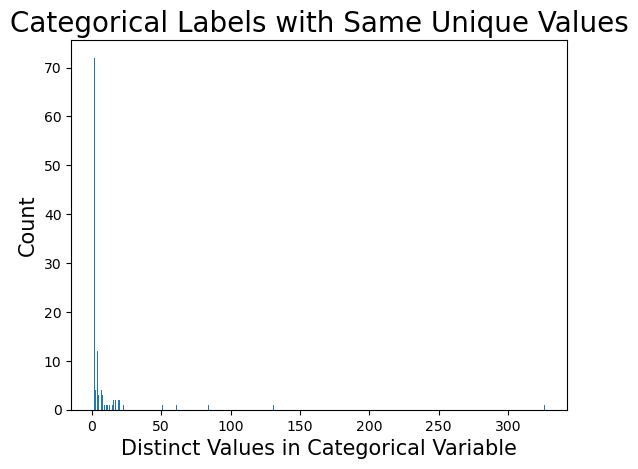

In [19]:
#plot showing the count of columns having same number of unique values
keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values,width=0.8)
plt.xlabel('Distinct Values in Categorical Variable', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Categorical Labels with Same Unique Values',fontsize=20)
plt.rcParams['figure.figsize'] = [48/2.54, 10/2.54]
plt.show()

## EDA for continous variables

In [21]:
#descriptive statistics
train[continous_columns].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


## Data Cleaning and Preprocessing

In [23]:
#cheking missing values
missing_values = train.isnull().sum()
np.max(missing_values)


0

In [24]:
#manually instering a blank value across 5 rows
total_rows = train.shape[0]
columns_with_blanks_cat = np.random.randint(1,116,2)
columns_with_blanks_cont = np.random.randint(117,130,3)
columns_with_blank = np.append(columns_with_blanks_cat,columns_with_blanks_cont)

#for every column insert 5 blanks at random Locations
for col in columns_with_blank:
    rows_with_blanks = np.random.randint(1,total_rows,5)
    train.iloc[rows_with_blanks,col] = np.nan



In [25]:
missing_values = train.isnull().sum()
np.max(missing_values)

5

In [26]:
#columns with missing values
columns_with_missing  = train.columns[train.isnull().any()]
print(columns_with_missing)

Index(['cat44', 'cat75', 'cont3', 'cont7', 'cont12'], dtype='object')


# Handling Outliers

In [28]:
class Data_preprocessing:
    """
    Data Preprocessing class with the following functions:
    
    missing_value_continuous: function to handle missing values of continuous variables
    missing_value_categorical: function to handle missing values of categorical variables
    outlier_treatment: function to handle continuous outliers in the dataset

    """
    def __init__(self,train):
        self.train = train
    
    def missing_value_continuous(self,column_names_with_specific_type,imputation_type="mean"):
        """
        function to handle missing values of continuous variables
        
        """
        if imputation_type=="mean":
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            mean_imputer.fit(self.train[column_names_with_specific_type])
            self.train[column_names_with_specific_type]=mean_imputer.transform(self.train[column_names_with_specific_type])
        if imputation_type=="median":
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            median_imputer.fit(self.train[column_names_with_specific_type])
            self.train[column_names_with_specific_type]=median_imputer.transform(self.train[column_names_with_specific_type])
        return self.train
    
    def missing_value_categorical(self,column_names_with_specific_type,imputation_type="most_frequent"):
        """
        function to handle missing values of categorical variables
        
        """
        most_frequent = SimpleImputer(strategy="most_frequent")
        most_frequent.fit(self.train[column_names_with_specific_type])
        self.train[column_names_with_specific_type] = most_frequent.transform(train[column_names_with_specific_type])
        return self.train
    
    def outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action):
        """
        function to handle continuous outliers in the dataset
        
        """
        if action=="median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                meadian_outlier = np.median(self.train[column_name])
                self.train.loc[self.train[((self.train[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=meadian_outlier
        if action=="mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train[column_name])
                self.train.loc[self.train[((self.train[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=mean_outlier
        if action=="remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train = self.train[~((self.train[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train

In [29]:
Data_preprocessing_obj = Data_preprocessing(train)
train = Data_preprocessing_obj.missing_value_continuous(continous_columns,"median")
train = Data_preprocessing_obj.missing_value_categorical(categorical_columns)

In [30]:
#Validate the number of columns with missing values
missing_values = train.isnull().sum()
np.max(missing_values)

0

## Detecting and Handling outliers

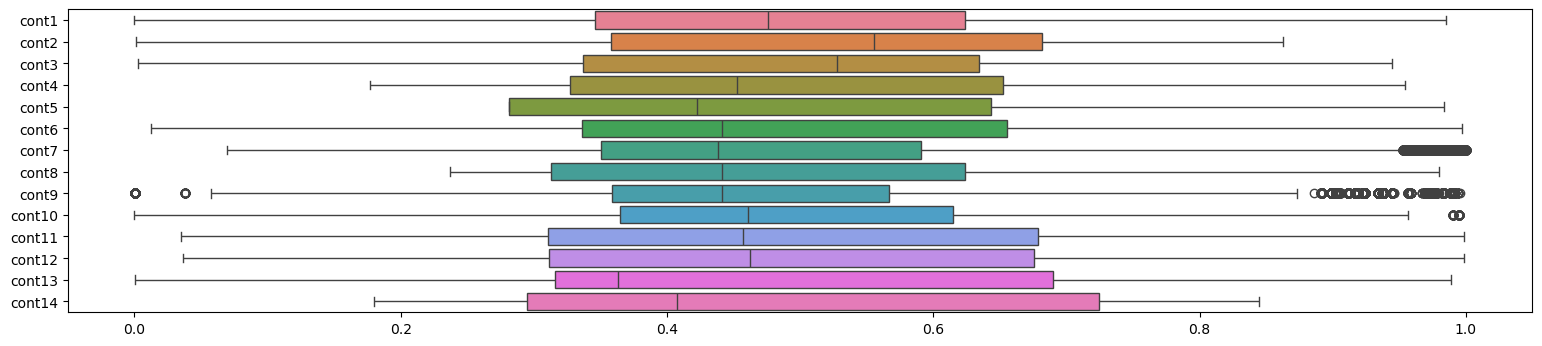

In [32]:
ax = sns.boxplot(data=train[continous_columns],orient='h')

In [33]:
#from the boxplot 
columns_with_outlier = ['cont7','cont9','cont10']

In [34]:
#computing the interquartile range
Q1 = train[continous_columns].quantile(0.25)
Q3 = train[continous_columns].quantile(0.75)
IQR = (Q3-Q1)
train = Data_preprocessing_obj.outlier_treatment(Q1,Q3,IQR,columns_with_outlier,'median')

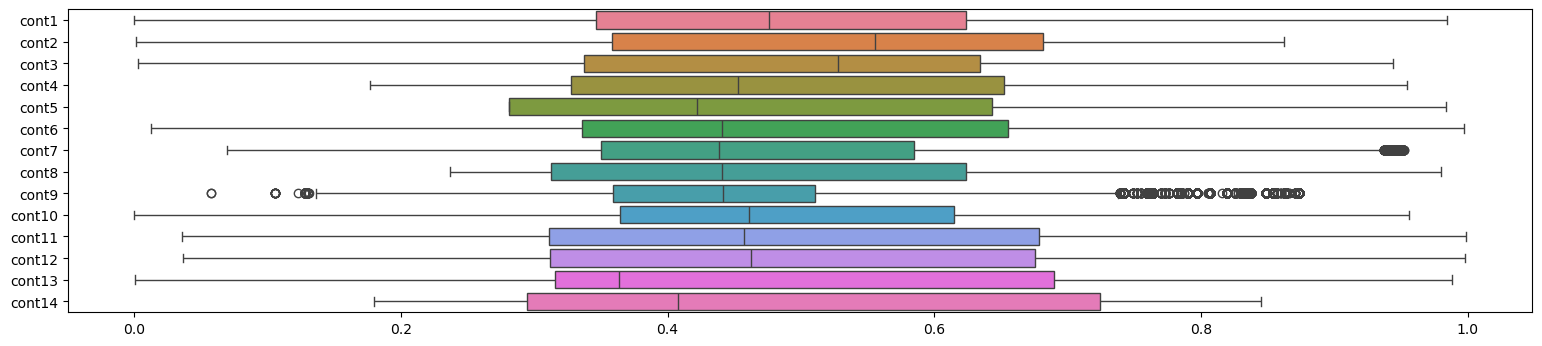

In [35]:
ax = sns.boxplot(data=train[continous_columns],orient='h')

## Feature Selection 

#PCA

In [38]:
#standardizing the numerical features
sc=StandardScaler()
train_nums_std = sc.fit_transform(train[continous_columns])

In [39]:
# setting n_components to None to keep all the principal components
pca=PCA(n_components=None)
train_nums_pca = pca.fit_transform(train_nums_std)
varExp = pca.explained_variance_ratio_

([<matplotlib.axis.YTick at 0x265c810b950>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

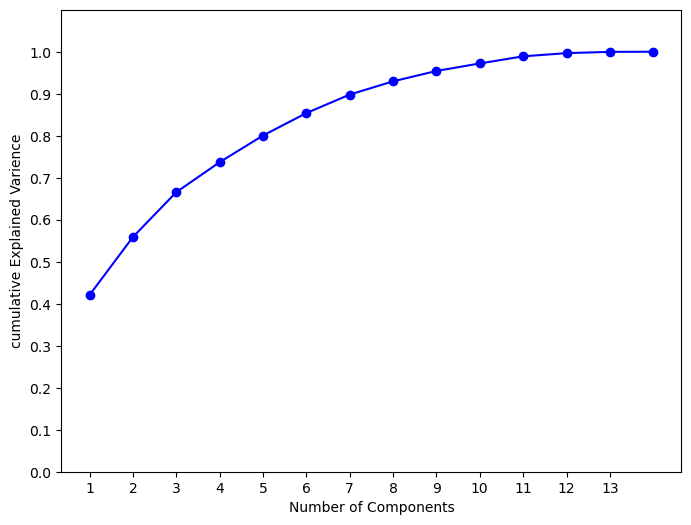

In [40]:
#plotting the varirnce captured by adding up the var of components
cumVarExplained = []
nb_components = []
counter = 1
for i in varExp:
    cumVarExplained.append(varExp[0:counter].sum())
    nb_components.append(counter)
    counter += 1

plt.subplots(figsize=(8,6))
plt.plot(nb_components,cumVarExplained,'bo-')
plt.ylabel('cumulative Explained Varience')
plt.xlabel('Number of Components')
plt.ylim([0.0,1.1])
plt.xticks(np.arange(1,len(nb_components),1.0))
plt.yticks(np.arange(0.0,1.1,0.10))

From the figure above we see that with 7 components we already explain more than 90% of all variance in the features. So we could reduce the number of features to half of the original numerical features.

# eliminatatin the unnecessary attributes

In [43]:
#Function for feature selection of numeric variables
#Remove variables with constant variance
#Remove variables with Quasi-Constant variance with a fixed threshold
#Remove correlated variables

def feature_selection_numerical_variables(train,qthreshold,corr_threshold,exclude_numerical_cols_list):
    """
    Function for feature selection of numeric variables, takes the following arguments:
    1. training data
    2. Quasi-Constant threshold - threshold we want to select to eliminate Quasi-Constant correlated variables
    3. correlation threshold - threshold on which we are focusing to elimitae variable which are correlated against each other
    4. a list - to exclude certain columns which we want to retain in the dataset
    
    """
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns = list(train.select_dtypes(include=num_colums).columns)
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    # features that we can eliminate from the dataset
    #remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train[numerical_columns])
    constant_columns = [column for column in train[numerical_columns].columns 
                    if column not in train[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train.drop(labels=constant_columns, axis=1, inplace=True)
        # if constant_column > 0, then there is constant variable in dataset and it will be drop

    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
        
    #remove variables with qconstant variance
    #Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train[numerical_columns])
    qconstant_columns = [column for column in train[numerical_columns].columns 
                         if column not in train[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]
    
    
    #Identify and remove correlated variables
    correlated_features = set()
    correlation_matrix = train[numerical_columns].corr()
    ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
    #print(correlation_matrix)
    
    # eliminationg variable with correlation
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train,constant_columns,qconstant_columns,correlated_features
    
    
    
    

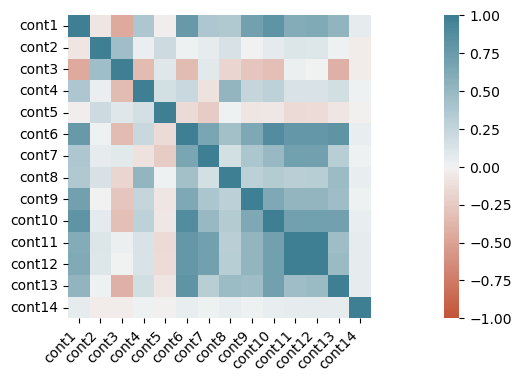

In [44]:
# passing variables and calling the function
train,constant_columns,qconstant_columns,correlated_features =feature_selection_numerical_variables(train,0.01,0.75,['loss','id'],)

## Continous Variables that can be dropped 

In [46]:
# variables that have beeen eliminated
correlated_features

{'cont10', 'cont12', 'cont6'}

Handling correlation between categorical Variables

In [48]:
#saving the encodrs to be fitted on test data
for cf1 in categorical_columns:
    le = LabelEncoder()
    le.fit(train[cf1].unique())
    filename = cf1+'.sav'
    pickle.dump(le,open(filename,'wb'))
    #transforming the training dataset
    train[cf1] = le.transform(train[cf1])

In [49]:
#unique values with categorical columns
df = pd.DataFrame(columns=['Column_Name', 'Count'])
for cat in categorical_columns:
    unique_value_count = len(train[cat].unique())
    # Create a temporary DataFrame for the row to add
    temp_df = pd.DataFrame({'Column_Name': [cat], 'Count': [int(unique_value_count)]})
    # Concatenate the temp_df to df
    df = pd.concat([df, temp_df], ignore_index=True)

columns_unique_value = np.array(df['Count'].value_counts().index)


In [50]:
df

,Column_Name,Count
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
...,...,...
111,cat112,51
112,cat113,61
113,cat114,19
114,cat115,23


In [51]:
#snippet to identify the dependent/correlated categorical variables and drop them
    # initialize 2 data structure: a set and a dictionary
        
columns_to_drop_cat = set()
correlated_columns = dict()
# find unique value in the array 'columns_unique_value'
for unique_value_count in columns_unique_value:
    if unique_value_count>1: # if >1 - no need to compute Chi-Square Test
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train[columns_compare_against],train[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                # if chi_scores less than 0.05 then reject the null, there is relationship between variable
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                #  if null rejected, add it to columns_to_drop_array 
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)
        


In [52]:
columns_to_drop_cat

{'cat10',
 'cat106',
 'cat107',
 'cat11',
 'cat111',
 'cat114',
 'cat12',
 'cat13',
 'cat14',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat2',
 'cat20',
 'cat21',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat3',
 'cat30',
 'cat31',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat4',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat5',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat6',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat7',
 'cat70',
 'cat71',
 'cat72',
 'cat74',
 'cat76',
 'cat78',
 'cat79',
 'cat8',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat9',
 'cat91',
 'cat92',
 'cat97',
 'cat98'}

In [53]:
from_list = columns_to_drop_cat
print(',   '.join(from_list))

cat44,   cat83,   cat23,   cat56,   cat85,   cat86,   cat61,   cat70,   cat82,   cat54,   cat37,   cat43,   cat114,   cat46,   cat28,   cat60,   cat68,   cat97,   cat59,   cat20,   cat12,   cat48,   cat67,   cat39,   cat106,   cat76,   cat79,   cat6,   cat5,   cat36,   cat92,   cat9,   cat69,   cat53,   cat16,   cat72,   cat11,   cat18,   cat17,   cat35,   cat66,   cat80,   cat31,   cat81,   cat33,   cat24,   cat87,   cat55,   cat40,   cat50,   cat45,   cat27,   cat21,   cat64,   cat42,   cat4,   cat41,   cat13,   cat65,   cat38,   cat2,   cat14,   cat8,   cat29,   cat51,   cat58,   cat62,   cat19,   cat52,   cat78,   cat107,   cat71,   cat84,   cat34,   cat49,   cat7,   cat57,   cat25,   cat3,   cat26,   cat63,   cat111,   cat30,   cat74,   cat98,   cat47,   cat91,   cat10


In [54]:
from_list2 = columns_to_drop_cat
print (',    '.join(from_list2))

cat44,    cat83,    cat23,    cat56,    cat85,    cat86,    cat61,    cat70,    cat82,    cat54,    cat37,    cat43,    cat114,    cat46,    cat28,    cat60,    cat68,    cat97,    cat59,    cat20,    cat12,    cat48,    cat67,    cat39,    cat106,    cat76,    cat79,    cat6,    cat5,    cat36,    cat92,    cat9,    cat69,    cat53,    cat16,    cat72,    cat11,    cat18,    cat17,    cat35,    cat66,    cat80,    cat31,    cat81,    cat33,    cat24,    cat87,    cat55,    cat40,    cat50,    cat45,    cat27,    cat21,    cat64,    cat42,    cat4,    cat41,    cat13,    cat65,    cat38,    cat2,    cat14,    cat8,    cat29,    cat51,    cat58,    cat62,    cat19,    cat52,    cat78,    cat107,    cat71,    cat84,    cat34,    cat49,    cat7,    cat57,    cat25,    cat3,    cat26,    cat63,    cat111,    cat30,    cat74,    cat98,    cat47,    cat91,    cat10


In [55]:
print(len(columns_to_drop_cat))

88


In [56]:
# drop the correlated variabels
train = train.drop(columns_to_drop_cat,axis=1)

In [57]:
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

#output the columns_to_drop file to a csv
columns_to_drop_df=pd.DataFrame(columns_to_drop,columns=['colnames'])
columns_to_drop_df.to_csv("columns_to_drop.csv",index=False)

## Visualizing the Output Variable

C:\Users\2022r\AppData\Local\Temp\ipykernel_10088\1459637526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['loss'], hist=True, kde=True,


<Axes: xlabel='loss', ylabel='Density'>

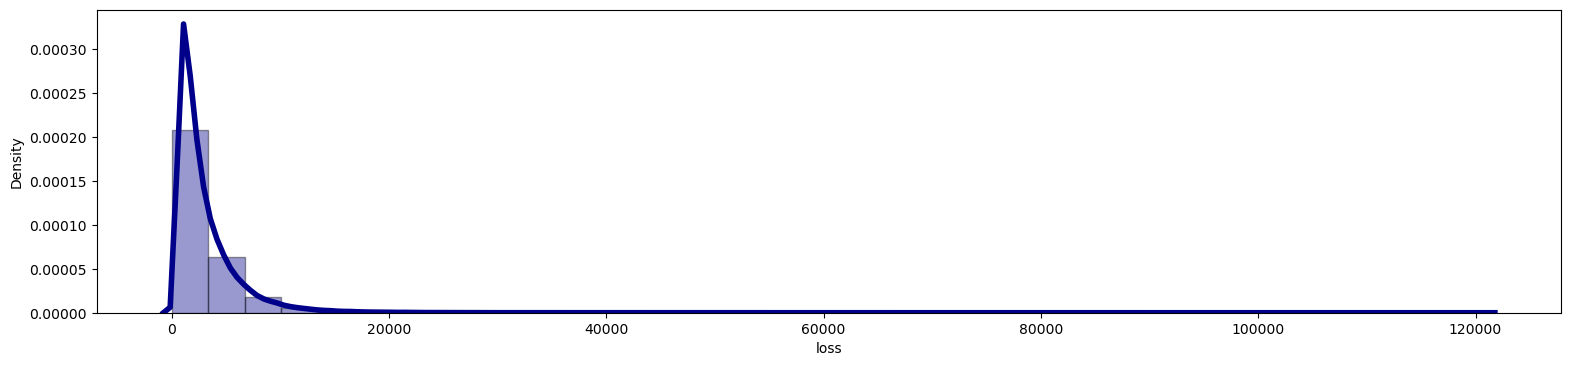

In [59]:
#distribuion of loss value 
sns.distplot(train['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [60]:
#lots of obeservation with high value , long tail . We would like to bring those observations as close as possible
train['loss'] = np.log(train['loss'])

C:\Users\2022r\AppData\Local\Temp\ipykernel_10088\1544027489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['loss'], hist=True, kde=True,


<Axes: xlabel='loss', ylabel='Density'>

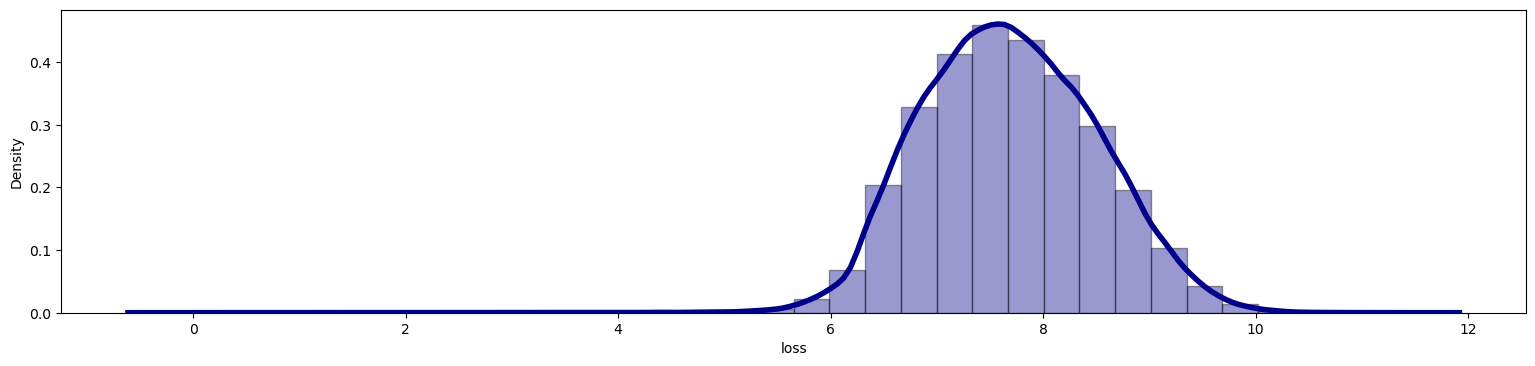

In [61]:
# Visualizing the distribution of loss value after log transformation
# Density Plot and Histogram of loss
sns.distplot(train['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\2022r\AppData\Local\Temp\ipykernel_10088\1730600486.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(train['loss']), hist=True, kde=True,


<Axes: xlabel='loss', ylabel='Density'>

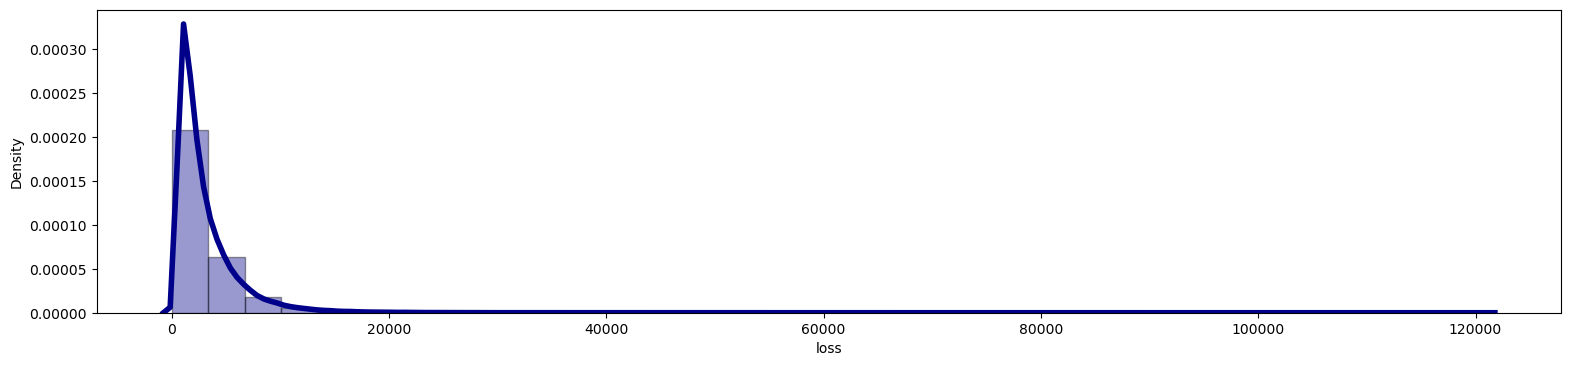

In [62]:
#taking a anti-log to transform the variable back to its original scale
sns.distplot(np.exp(train['loss']), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Data Modeling

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

To compute the Chi-Square Test previously, we have converted the categorical variables in to integers. Now when we are fitting it to the Random Forest; for the Random Forest to make the split, it basically takes into consideration the values which are present and it needs to treat the integers as categories, so that and not really a real number for deciding each split. So as to handle that we are converting the int64 columns back into categerocal variables.

In [66]:
#convert the int64 columns categorical
Column_datatypes= train.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)
train[Integer_columns] = train[Integer_columns].astype('category',copy=False)
X,y = train.drop(['id','loss'],axis=1),train['loss']
# dividing data into Train-Test Split
# 33% of the data we are using as the test set and rest in traing Ml model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
# Instantiate model with 100 decision trees
rf_base = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)
rf_base.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [68]:
#save the model output
pickle.dump(rf_base, open("basemodel_rf", 'wb'))

In [69]:
#load the saved model and predict on the test data
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))

In [70]:
#validate the accuracy of the base model
#compare the model accuracies
Y_test_predict_base = basedmodel_rf.predict(X_test)
print("Base model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))

Base model accuracy: 0.6664537426208085


## The most Important features for Allstate

In [72]:
!pip install yellowbrick


C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


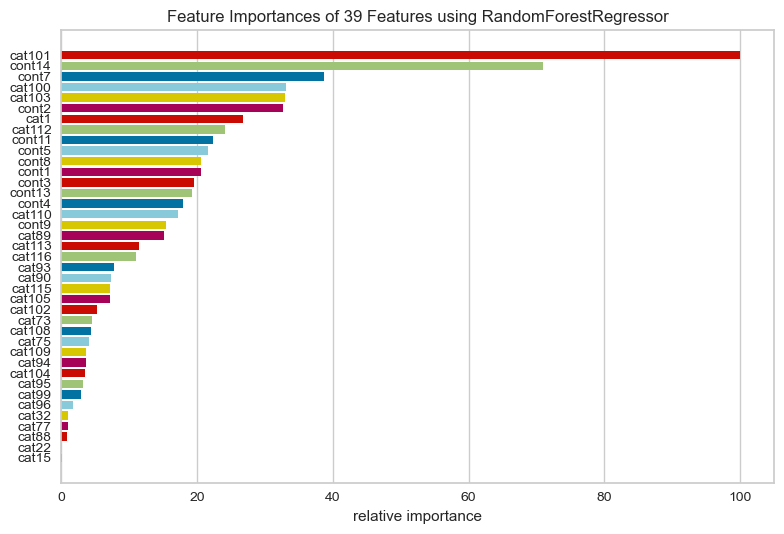

<Axes: title={'center': 'Feature Importances of 39 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [73]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(rf_base)
viz.fit(X,y)
viz.show()

Feature ranking:
1. feature 16 (0.156406)
2. feature 38 (0.110955)
3. feature 33 (0.060593)
4. feature 15 (0.051736)
5. feature 18 (0.051460)
6. feature 29 (0.051013)
7. feature 0 (0.041760)
8. feature 24 (0.037580)
9. feature 36 (0.034839)
10. feature 32 (0.033659)
11. feature 34 (0.032174)
12. feature 28 (0.032107)
13. feature 30 (0.030632)
14. feature 37 (0.030096)
15. feature 31 (0.028014)
16. feature 23 (0.026846)
17. feature 35 (0.024001)
18. feature 8 (0.023610)
19. feature 25 (0.017816)
20. feature 27 (0.017236)
21. feature 10 (0.012216)
22. feature 9 (0.011361)
23. feature 26 (0.011277)
24. feature 20 (0.011076)
25. feature 17 (0.008170)
26. feature 4 (0.007066)
27. feature 21 (0.006878)
28. feature 5 (0.006324)
29. feature 22 (0.005766)
30. feature 11 (0.005659)
31. feature 19 (0.005407)
32. feature 12 (0.005030)
33. feature 14 (0.004436)
34. feature 13 (0.002594)
35. feature 3 (0.001440)
36. feature 6 (0.001402)
37. feature 7 (0.001237)
38. feature 2 (0.000092)
39. feature 1

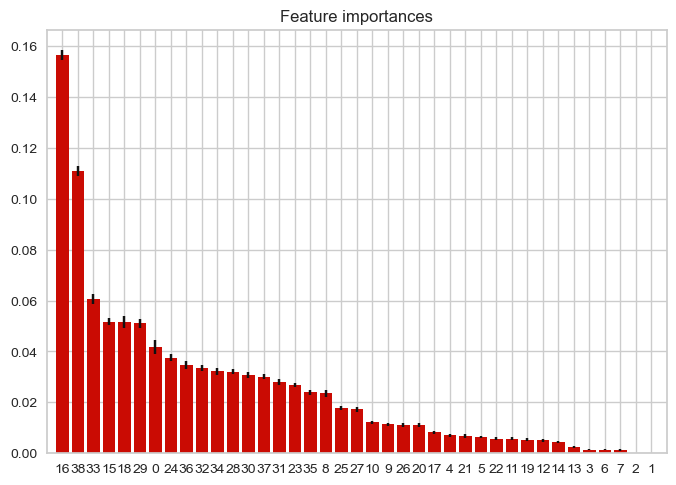

In [74]:
# Most important features
importances = rf_base.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_base.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()   

## Hyperparameter Tuning

In [76]:
#RandomSearchCV for hyperparameter tuning
#nuber of trees 
n_estimators=[100,200,300,400,500]
#number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
#minimum number of samples required to split a node
min_samples_split = [200,400,600]
#minimum number of sample required at each leaf node
min_samples_leaf = [1,2,4]
#Method of selecting samples for training tree
bootstrap = [True, False]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}

In [77]:
# Use the random grid to search for best hyperparameters
# base model to tune
rf = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\2022r\anaconda3\Lib\site-packages\sk

In [78]:
#check the best params
rf_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [79]:
#load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict_tuned = tunedmodel_rf.predict(X_test)
print("Tuned model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Tuned model accuracy: 0.6527472019387941


## Gradient Boosting Model

In [81]:
from sklearn.ensemble import GradientBoostingRegressor 

gbm_base = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)

gbm_base.fit(X_train,y_train)

#saving the model
pickle.dump(gbm_base,open('basemodel_GBM','wb'))

In [82]:
#load the saved model and predict on the test data
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))

Y_test_predict_tuned = basemodel_GBM.predict(X_test)
print("Base model GBM accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Base model GBM accuracy: 0.700441704952552


C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


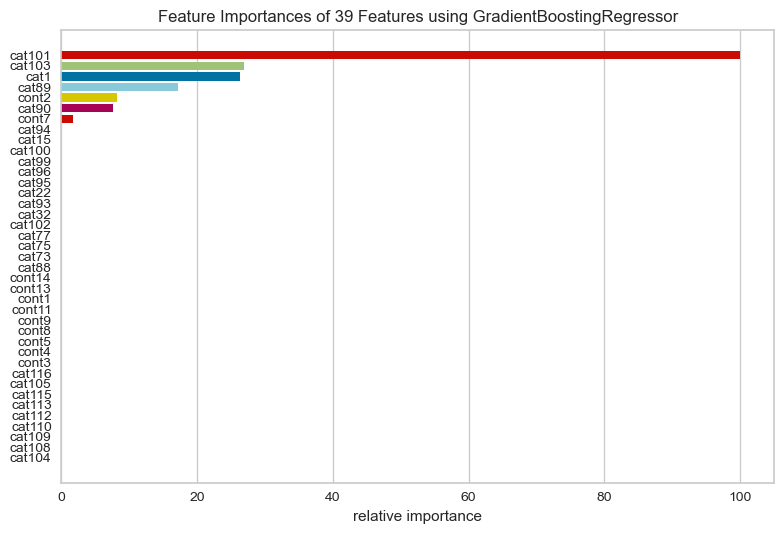

<Axes: title={'center': 'Feature Importances of 39 Features using GradientBoostingRegressor'}, xlabel='relative importance'>

In [83]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(gbm_base)
viz.fit(X, y)
viz.show()